#1b: 
## Homework 4: Capstone 

## Kobie Williams and Nyles Geiger

#### 4/12/2022

In [1]:
import numpy as np 
import pandas as pd 


In [2]:
people = pd.read_csv('https://drive.google.com/uc?export=download&id=1Xza-mD7u0w3AHMvntoQMaXu3AlX9BAbA')

social_media = pd.read_csv('https://drive.google.com/uc?export=download&id=1XwXv7CoqmqfVe4UCKwQvrkPiwLarOjLo')

social_connect = pd.read_csv('https://drive.google.com/uc?export=download&id=1Xue80IWkuKZMkl6AofA4zYslLMKLvRmP')

In [3]:
people.describe() 

,ID,Weight,ZipCode,SqFt,Shoes,Commute,Income
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,1500.000000
mean,101000.500000,144.492835,3808.212000,2071.45350,7.134000,26.112925,66894.393680
std,577.494589,31.996841,3132.924239,587.90871,3.807005,18.726101,45953.545286
min,100001.000000,59.000000,221.000000,5.00000,0.000000,0.050000,754.080000
25%,100500.750000,120.642500,221.000000,1740.75000,4.000000,11.045000,34024.247500
50%,101000.500000,143.790000,3977.000000,2033.50000,7.000000,22.875000,54956.200000
75%,101500.250000,166.147500,6861.000000,2284.25000,10.000000,37.717500,86720.820000
max,102000.000000,249.070000,8161.000000,6495.00000,24.000000,117.070000,400211.640000


In [4]:
# print(df["Tweet Text"])
print("Cleaning People df... ")
print()

#Have to add a .replace to some of these places 
#Maybe even just drop the whole column 

#We don't wan't to use the mask 
mask = people["Water"].str.contains('[^\?]')
people["Water"] = people["Water"][mask]

#Filling the NaN values with 0's 
people["Water"] = people["Water"].fillna(0)


nmask = people["NumKids"].str.contains('[^None]')
people["NumKids"] = people["NumKids"][mask]

print("Done...")

Cleaning People df... 

Done...


In [5]:
people['Water'] = people['Water'].astype(float)

In [6]:
people.dtypes

ID            int64
Name         object
Gender       object
BirthDay     object
Weight      float64
ZipCode       int64
SqFt          int64
Pets         object
Water       float64
Shoes         int64
Commute     float64
NumKids      object
Exercise     object
Income      float64
Beverage     object
dtype: object

In [7]:
mask

0        True
1       False
2        True
3        True
4       False
        ...  
1995     True
1996     True
1997     True
1998     True
1999     True
Name: Water, Length: 2000, dtype: bool

In [8]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [9]:
#Changing the birthday column to age 
people['Birthday'] = pd.to_datetime(people.BirthDay) 


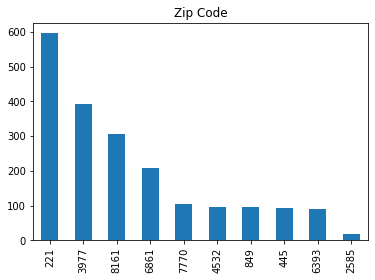

In [10]:
people["ZipCode"].value_counts().plot(kind='bar', title="Zip Code")

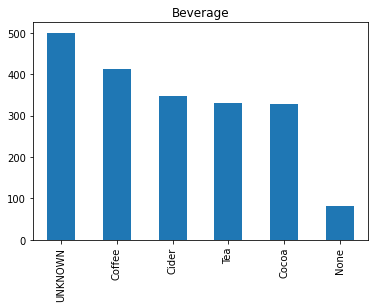

In [11]:
people["Beverage"].value_counts().plot(kind='bar', title="Beverage")

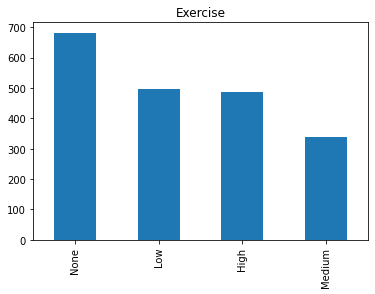

In [12]:
people["Exercise"].value_counts().plot(kind='bar', title="Exercise")

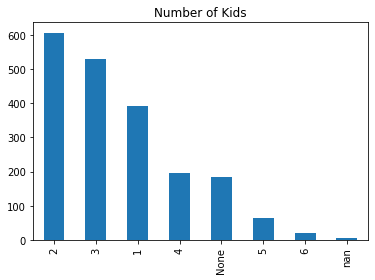

In [13]:
people["NumKids"].value_counts(dropna=False).plot(kind='bar', title="Number of Kids")

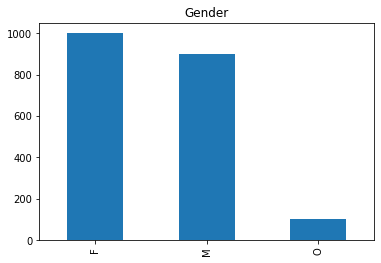

In [14]:
people["Gender"].value_counts().plot(kind='bar', title="Gender")

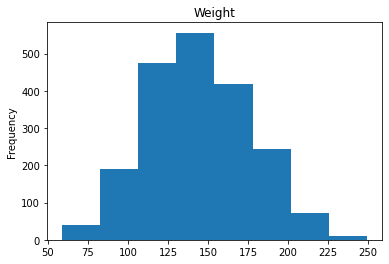

In [15]:
people["Weight"].plot(kind='hist', title="Weight", bins=8)

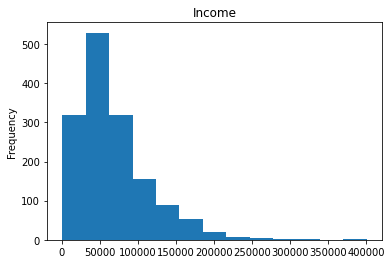

In [16]:
people["Income"].plot(kind='hist', title="Income", bins=13)

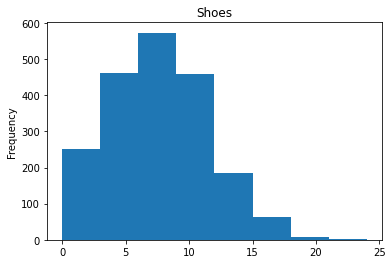

In [17]:
people["Shoes"].plot(kind='hist', title="Shoes", bins=8)

In [18]:
print(people["ZipCode"].value_counts())

221     596
3977    393
8161    307
6861    208
7770    104
4532     96
849      95
445      92
6393     90
2585     19
Name: ZipCode, dtype: int64


Obeservations about data:

- about 75% of the entries live in the Zipcodes 221, 3977, 8161, and 6861
- Most people own 5-10 pairs of shoes
- The data is provided by nearly 50% women and 50% men
- Most of these entries have kids and earn around $50,000

#### 3

#### a

In [19]:
import networkx as nx 
from operator import itemgetter 

In [20]:

node_names = social_connect.iloc[:, 0].unique()

edges = []

for index, row in social_connect.iterrows():
  source = row.iloc[0]
  target = row.iloc[1]
  edges.append((source, target))

print("num of nodes:",len(node_names))
print("num edges:",len(edges))

G = nx.Graph()
G.add_nodes_from(node_names)
G.add_edges_from(edges)

print(nx.info(G))

num of nodes: 1820
num edges: 10645
Graph with 2000 nodes and 10645 edges


#### b

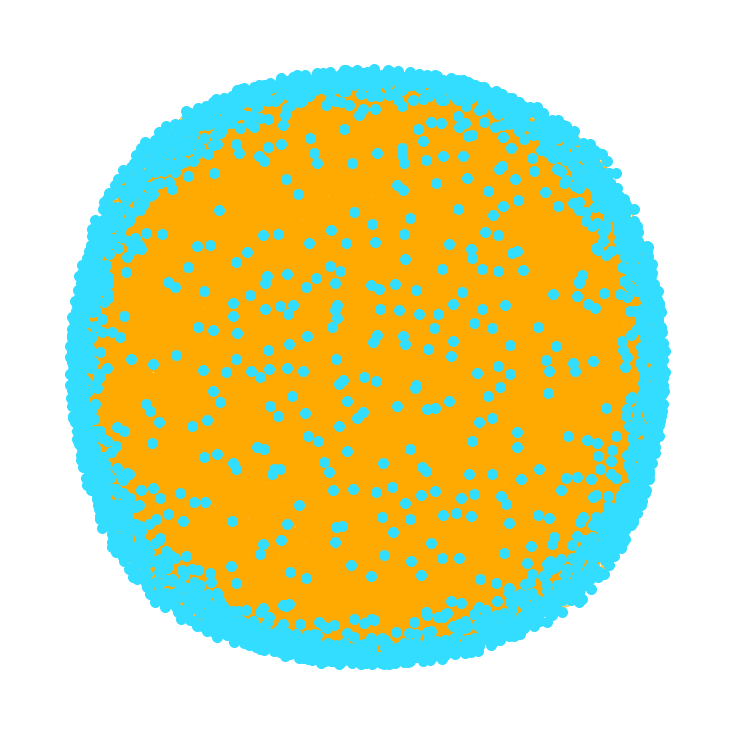

In [21]:
# Calculate the best position for laying out the nodes graphically.
# k controls how far apart nodes are forced to be and will usually need to be
# adjusted for each different graph.
pos = nx.spring_layout(G, k=1.0)

plt.figure(figsize=(10,10))
nx.draw(G, pos=pos, with_labels=False,
        node_color='#33ddff', node_size=100,
        edge_color='#ffaa00', width=0.5)
plt.show()

#### c

In [22]:
print('- In Degree Centrality:\n', sorted(nx.degree_centrality(G).items(), key=itemgetter(1))[:20])
print('\n- Betweenness Centrality:\n', (sorted(nx.betweenness_centrality(G).items(), key=itemgetter(1)))[:20])
print('\n- Closeness Centrality:\n', (sorted(nx.closeness_centrality(G).items(), key=itemgetter(1)))[:20])
print('\n- Eigenvector Centrality\n', (sorted(nx.eigenvector_centrality(G).items(), key=itemgetter(1)))[:20])

- In Degree Centrality:
 [(101007, 0.0005002501250625312), (100797, 0.0010005002501250625), (101557, 0.0010005002501250625), (100903, 0.0010005002501250625), (100283, 0.0010005002501250625), (100924, 0.0015007503751875936), (100121, 0.0015007503751875936), (101990, 0.0015007503751875936), (100570, 0.0015007503751875936), (101131, 0.0015007503751875936), (100336, 0.0015007503751875936), (101162, 0.0015007503751875936), (100070, 0.0015007503751875936), (100847, 0.0015007503751875936), (101427, 0.0015007503751875936), (101330, 0.0015007503751875936), (101810, 0.0015007503751875936), (101099, 0.0015007503751875936), (100305, 0.0015007503751875936), (100916, 0.0015007503751875936)]

- Betweenness Centrality:
 [(101007, 0.0), (100797, 6.730330225411099e-07), (100283, 9.359889694516403e-06), (101810, 9.565668510981517e-06), (100070, 1.076912625539971e-05), (100807, 1.611336175945273e-05), (101475, 1.9521668423460423e-05), (101990, 2.523337487269926e-05), (100209, 2.5411758085132305e-05), (100

8 communities found


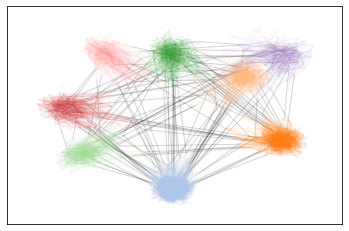

In [23]:
# This library helps find communities within social network graphs
import networkx.algorithms.community as nxcom

# For large networks, this may take a while (34 seconds)
communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)

# communities is a list of sets of vertices
# E.g., communities[0] is a list of the vertices in the first community
print(len(communities), 'communities found')

# Let's use a colormap to define colors for our communities
from matplotlib import cm
# this colormap has RGB values for 20 distinct colors
cm.tab20.colors


# Helper functions to labels nodes/edges with community
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1
            
def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0

# Helper function to get distinct colors for display
def get_color(i):
    colors = cm.tab20.colors

    # If i gets too big for how many colors we have, wrap around
    if i > len(colors)-5:
        i = i % len(colors)

    return colors[i]


# Set node and edge communities
set_node_community(G, communities)
set_edge_community(G)


# Set community color for internal edges
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = [get_color(G.edges[e]['community']) for e in internal]



# Draw external edges
pos = nx.spring_layout(G, k=0.1)
nx.draw_networkx(
    G, pos=pos, node_size=0,
    edgelist=external, edge_color="#333333",
    alpha=0.2, with_labels=False)
# Draw internal edges
nx.draw_networkx(
    G, pos=pos, node_size=0,
    edgelist=internal, edge_color=internal_color,
    alpha=0.05, with_labels=False)

#### 4

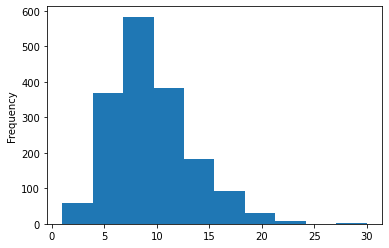

In [24]:
social_media['PosterID'].value_counts().plot(kind='hist')

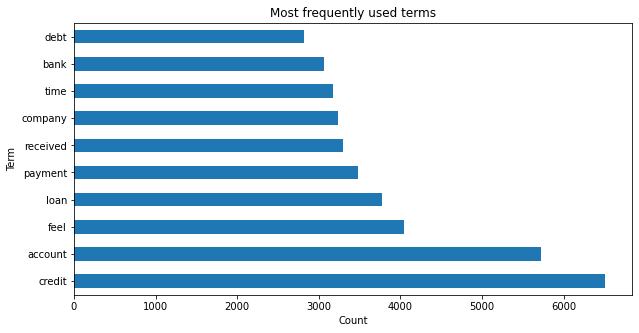

In [25]:
sc_corpus = pd.DataFrame(social_media["Post"].to_numpy(), columns=['doc_text'])
# print(sc_corpus)

from sklearn.feature_extraction.text import CountVectorizer

# Specify stop words that should be ignored.
stop_list = ['a', 'an', 'the', 'and', 'has', 'I', 'in', 'for', 'but', 'of',
              'not', 'can', 'are', 'not', 'when', 'it', 'is', 'its', 'comes',
              'do', 'be', 'how', 'put', 'able', 'been', 'just', 'into', 'so', 'me',
              'you', 'we', 'our', 'on', 'to', 'rt', 'co', 'your', 'this', 'with',
              'at', 'about', 'from', 'that', 'great', 'you', 'by', 'with', 'at',
              'what', 'as', 'they', 'my', 'them', 'had', 'me', 'was', 'have', 'would',
              'their', 'all', 'or', 'no', '00', 'xxxx', 'xx', 'am', 'did', 'which',
             'told']

count_vect = CountVectorizer(lowercase=True, stop_words=stop_list, max_features=25)
sparse_counts = count_vect.fit_transform(sc_corpus['doc_text'])

counts = np.asarray(sparse_counts.todense())

count_vect.get_feature_names_out()

terms = count_vect.get_feature_names_out()
total_counts = counts.sum(axis=0)

df_counts = pd.DataFrame()
df_counts['term'] = terms
df_counts['count'] = total_counts
df_counts = df_counts.sort_values(by='count', ascending=False)

# Just keep the top 10
df_counts = df_counts.iloc[:10]

df_counts.plot(y='count', x='term', kind='barh', legend=None, figsize=(10, 5))
plt.xlabel('Count')
plt.ylabel('Term')
plt.title('Most frequently used terms')
plt.show()


In the text there were a lot of instances where people were using 'xxx' or 'xxxx'. I assume this means seneitive information was being blocked.

The demographic must be working individuals because the common words are mostly financial in nature. This could be a forum for people to release their finanical frustrations, hence debt is at the top of the chart



###5

In [26]:
people.head(1)

,ID,Name,Gender,BirthDay,Weight,ZipCode,SqFt,Pets,Water,Shoes,Commute,NumKids,Exercise,Income,Beverage,Birthday
0,100001,Imogene Hackett,F,1939-10-17,164.24,221,2044,"dog,cat,cat,hamster,hamster,dog",114.1,9,42.13,1,Low,89897.46,Coffee,1939-10-17


In [27]:
people['Exercise'].value_counts()

None      682
Low       495
High      486
Medium    337
Name: Exercise, dtype: int64

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import make_pipeline 

#First 1500 rows 
p1500 = people.head(1500) 

#Last 500 rows 
p500 = people.tail(500) 

#Training data 
Xtrain = p1500[['Gender','Weight',  'SqFt', 'Water', 'Shoes', 'Commute', 'NumKids', 'Exercise']]

#Getting dummies to make data better 
Xdumb = pd.get_dummies(Xtrain)

#normalize the data 

#Training output 
ytrain= p1500['Income'] 

#Test variables from the last 500 rows 
Xtest = p500[['Gender','Weight', 'SqFt', 'Water', 'Shoes', 'Commute', 'NumKids', 'Exercise']]

#Remove ytest because we have to predict it, and we don't have the right answers 
#ytest = p500['Income']

# from sklearn.model_selection import train_test_split
#Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.25, random_state=0)





In [29]:
 #Getting dummies 
Xdumb2 = pd.get_dummies(Xtest)

In [30]:
#Creating the model, we have 8 attributes to try 

In [31]:

model = LinearRegression()
model.fit(Xdumb,ytrain) 
#DT_model = DecisionTreeRegressor(max_depth=5).fit(Xtrain,ytrain)
#DT_predict = DT_model.predict(X_test) #Predictions on Testing data 

LinearRegression()

In [32]:
#predicting the data 
ytest = model.predict(Xdumb) 
#new_ytest = ytest.reshape((-1,1)) 
print(ytest)

[ 79942.94570832  58864.7564692   68802.79263906 ...  53286.57798346
  50089.31205697 -13070.03811068]


In [33]:
ypred = model.predict(Xdumb2) 

In [34]:
for i in ypred: 
  print(i) 

20567.52273807665
44526.89952504257
33670.105530391025
77018.64428607267
36668.27487339138
35665.19778430403
86942.05045066754
90090.16993900301
59511.36627409855
50264.49814507175
32076.647931763317
71732.28733971831
67781.07488451165
-11920.161104930234
66910.72996000829
77214.11718026365
68405.87054670358
61482.14534141876
42223.1673314655
56453.8792521121
77856.57612651418
50486.09229883409
69484.91862234139
112409.93402433943
100461.21144920096
97139.59031850958
95838.18415591097
40036.51252766474
43295.31063793228
21707.528006144625
80621.68659856424
67339.20931661129
50191.15330724599
77431.29263789876
60208.89249131435
120181.6571213688
61287.346324802995
76781.47240213864
91461.58986761089
76860.00728118396
68486.69515240967
60811.09718000893
46558.99175037069
60966.98566402145
68387.5441566233
86350.3632459277
116465.91650312845
60807.789012189074
16461.23948647886
85253.01529375868
51736.10892592045
86754.58387713548
53682.97482263232
65382.13488300144
24241.346155223746
578

In [35]:
#plt.scatter(Xdumb, ytrain) 
#plt.plot()

In [36]:
#Randomly splitting the data 
rXtrain, rXtest, rytrain, rytest = train_test_split(Xdumb, ytrain,test_size=.50, random_state=0)

In [37]:
rmodel = LinearRegression()
rmodel.fit(rXtrain,rytrain)

LinearRegression()

In [38]:
rypred = rmodel.predict(rXtest) 

In [39]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [40]:
mae = mean_absolute_error(rytest, rypred)

In [41]:
#printing the mean absolute error 
mae

28848.24760726716

The final mae is 28848.24760726716. 

###6

In [42]:
#Variable to predict beverage 
class_ytrain = p1500['Beverage'] 

In [43]:
from sklearn.neighbors import KNeighborsClassifier 


In [44]:
class_model = KNeighborsClassifier(n_neighbors=2, metric='euclidean')

In [45]:
#1500 training data 
c_Xtrain = p1500[['Gender','Weight',  'SqFt', 'Water', 'Shoes', 'Commute', 'NumKids', 'Exercise']]
c_Xtrain = pd.get_dummies(c_Xtrain) 

#500 test data 
c_Xtest = p500[['Gender','Weight', 'SqFt', 'Water', 'Shoes', 'Commute', 'NumKids', 'Exercise']]
c_Xtest = pd.get_dummies(c_Xtest) 


In [46]:
#fit the model 
class_model.fit(c_Xtrain, class_ytrain) 


KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [48]:
classPred = class_model.predict(c_Xtest)

In [52]:
#Classification data split 
cXtrain, cXtest, cytrain, cytest = train_test_split(c_Xtrain, class_ytrain, test_size=0.5,random_state=0)

In [53]:
class_model.fit(cXtrain,cytrain)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [54]:
cypred= class_model.predict(cXtest)

In [55]:
cypred

array(['Tea', 'Cider', 'Tea', 'Cocoa', 'Tea', 'Coffee', 'Cider', 'Cider',
       'Cocoa', 'Cider', 'Cocoa', 'Tea', 'Cider', 'Cider', 'Cider',
       'Cocoa', 'Cocoa', 'Cider', 'Cocoa', 'Cider', 'Tea', 'Cocoa', 'Tea',
       'Cocoa', 'Cocoa', 'Coffee', 'Cider', 'Cider', 'Cocoa', 'Cider',
       'Coffee', 'Coffee', 'Coffee', 'Tea', 'Cocoa', 'Coffee', 'Cider',
       'Tea', 'Cider', 'Tea', 'Cider', 'Cider', 'Cocoa', 'Cider',
       'Coffee', 'Cider', 'Cocoa', 'Cocoa', 'Coffee', 'Cider', 'Tea',
       'Cider', 'Cider', 'Cocoa', 'Coffee', 'Cider', 'Coffee', 'Cocoa',
       'None', 'Cider', 'Cider', 'Tea', 'Cider', 'Cider', 'Cocoa',
       'Cider', 'Cider', 'None', 'Cider', 'Cocoa', 'Cider', 'Coffee',
       'Cocoa', 'Cocoa', 'Coffee', 'Coffee', 'Coffee', 'Cocoa', 'Cider',
       'Cider', 'Cider', 'Coffee', 'Coffee', 'Cider', 'Tea', 'Cider',
       'Cider', 'Coffee', 'Cider', 'Coffee', 'Cider', 'Cocoa', 'Cocoa',
       'Cocoa', 'Cider', 'Coffee', 'Cocoa', 'Coffee', 'Cider', 'Coffee',
       

In [56]:
for i in cypred: 
  print(i)

Tea
Cider
Tea
Cocoa
Tea
Coffee
Cider
Cider
Cocoa
Cider
Cocoa
Tea
Cider
Cider
Cider
Cocoa
Cocoa
Cider
Cocoa
Cider
Tea
Cocoa
Tea
Cocoa
Cocoa
Coffee
Cider
Cider
Cocoa
Cider
Coffee
Coffee
Coffee
Tea
Cocoa
Coffee
Cider
Tea
Cider
Tea
Cider
Cider
Cocoa
Cider
Coffee
Cider
Cocoa
Cocoa
Coffee
Cider
Tea
Cider
Cider
Cocoa
Coffee
Cider
Coffee
Cocoa
None
Cider
Cider
Tea
Cider
Cider
Cocoa
Cider
Cider
None
Cider
Cocoa
Cider
Coffee
Cocoa
Cocoa
Coffee
Coffee
Coffee
Cocoa
Cider
Cider
Cider
Coffee
Coffee
Cider
Tea
Cider
Cider
Coffee
Cider
Coffee
Cider
Cocoa
Cocoa
Cocoa
Cider
Coffee
Cocoa
Coffee
Cider
Coffee
Coffee
Coffee
Cocoa
Coffee
Coffee
Cocoa
Cider
Cocoa
None
Cocoa
Cider
Cider
Cocoa
Coffee
Cider
None
Cocoa
Cider
Coffee
Cocoa
Cider
Cider
Cocoa
Cocoa
Cider
Cocoa
Cider
Cider
Cider
Cider
Coffee
Cocoa
Cocoa
Cider
Coffee
Cocoa
Coffee
Cider
Cider
Cider
Cocoa
Cocoa
Cocoa
Coffee
Coffee
Cider
Coffee
Cider
Tea
Cocoa
Tea
Cocoa
Cider
Cocoa
Coffee
Cider
Coffee
None
Coffee
Cider
Cider
Coffee
Coffee
Cocoa
Cider
Cocoa

In [57]:
from sklearn.metrics import accuracy_score 
accuracy_score(cytest, cypred)

0.248

Accuracy is 0.248